In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [3]:
import pandas as pd #Manipulacion y analisis de datos
#train_test_split del modulo model_selection, funcion se utiliza para dividir un conjunto de datos
from sklearn.model_selection import train_test_split
#funcion LabelEncoder del modulo preprocessing, para codificar etiquetas categoricas en forma numerica
from sklearn.preprocessing import LabelEncoder

In [4]:
#Carga de dataset
data = pd.read_csv('./Earthquake_data_processed.csv', delimiter=';')
display(data)
data.info()

,Date(YYYY/MM/DD),Time(UTC),Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
0,1966/07/01,09:41:21.82,"35,9463","-120,47","12,26","3,2",Mx,7,171,20,"0,02",NCSN,-4540462
1,1966/07/02,12:08:34.25,"35,7867","-120,3265","8,99","3,7",Mx,8,86,3,"0,04",NCSN,-4540520
2,1966/07/02,12:16:14.95,"35,7928","-120,3353","9,88","3,4",Mx,8,89,2,"0,03",NCSN,-4540521
3,1966/07/02,12:25:06.12,"35,797","-120,3282","9,09","3,1",Mx,8,101,3,"0,08",NCSN,-4540522
4,1966/07/05,18:54:54.36,"35,9223","-120,4585","7,86","3,1",Mx,9,161,14,"0,04",NCSN,-4540594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18025,2007/12/19,12:14:09.62,"34,1438","-116,9822","7,03","4,06",ML,10,73,14,"0,08",NCSN,40207706
18026,2007/12/21,12:14:56.45,"37,3078","-121,6735","8,47","3,08",ML,114,45,5,"0,12",NCSN,51192926
18027,2007/12/23,21:43:43.54,"37,2127","-117,823",10,"3,54",ML,45,176,40,"0,07",NCSN,51193070
18028,2007/12/28,01:59:42.40,"36,5292","-121,1133","5,99","3,04",ML,70,45,4,"0,06",NCSN,51193343


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18030 entries, 0 to 18029
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date(YYYY/MM/DD)  18030 non-null  object
 1   Time(UTC)         18030 non-null  object
 2   Latitude(deg)     18030 non-null  object
 3   Longitude(deg)    18030 non-null  object
 4   Depth(km)         18030 non-null  object
 5   Magnitude(ergs)   18030 non-null  object
 6   Magnitude_type    18030 non-null  object
 7   No_of_Stations    18030 non-null  int64 
 8   Gap               18030 non-null  int64 
 9   Close             18030 non-null  int64 
 10  RMS               18030 non-null  object
 11  SRC               18030 non-null  object
 12  EventID           18030 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.8+ MB


Preprocesamiento de los datos

In [5]:
data = pd.read_csv('./Earthquake_data_processed.csv', delimiter=';')
#Eliminamos las columnas sin relevancia
data.drop(['SRC'], axis=1, inplace=True)# inplace=True, indica que la eliminación se realizará directamente en el DataFrame data
data.drop(['Time(UTC)'], axis=1, inplace=True)
data.drop(['EventID'], axis=1, inplace=True)
data.drop(['Date(YYYY/MM/DD)'], axis=1, inplace=True)

#convertimos las columnas como fechas, hra y texto a enteros
columnas_a_convertir = ['Magnitude_type']# Seleccionar las columnas especificadas

# Convertir las columnas de tipo object a int usando LabelEncoder
for columna in columnas_a_convertir:
    le = LabelEncoder()
    data[columna] = le.fit_transform(data[columna])

# Convertimos las columnas 'Latitude(deg)' y 'Longitude(deg)' a tipo float
data['Latitude(deg)'] = data['Latitude(deg)'].str.replace(',', '.').astype(float)
data['Longitude(deg)'] = data['Longitude(deg)'].str.replace(',', '.').astype(float)
data['Depth(km)'] = data['Depth(km)'].str.replace(',', '.').astype(float)
data['Magnitude(ergs)'] = data['Magnitude(ergs)'].str.replace(',', '.').astype(float)
data['RMS'] = data['RMS'].str.replace(',', '.').astype(float)

# Mostrar el DataFrame procesado
display(data)
print(data['Magnitude_type'].unique())

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS
0,35.9463,-120.4700,12.26,3.20,3,7,171,20,0.02
1,35.7867,-120.3265,8.99,3.70,3,8,86,3,0.04
2,35.7928,-120.3353,9.88,3.40,3,8,89,2,0.03
3,35.7970,-120.3282,9.09,3.10,3,8,101,3,0.08
4,35.9223,-120.4585,7.86,3.10,3,9,161,14,0.04
...,...,...,...,...,...,...,...,...,...
18025,34.1438,-116.9822,7.03,4.06,0,10,73,14,0.08
18026,37.3078,-121.6735,8.47,3.08,0,114,45,5,0.12
18027,37.2127,-117.8230,10.00,3.54,0,45,176,40,0.07
18028,36.5292,-121.1133,5.99,3.04,0,70,45,4,0.06


[3 0 1 2]


In [6]:
print("Valores de la columna Magnitude_type:")
print(data['Magnitude_type'].unique())

n=data['RMS'].unique()
print(n.size)

Valores de la columna Magnitude_type:
[3 0 1 2]
202


ALGORITMO DBSCAN

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Paso 1: NormalizaMOS los datos usando MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

display(data_normalized)


array([[3.05022765e-01, 4.56953986e-01, 1.01063391e-01, ...,
        4.64912281e-01, 6.75675676e-02, 4.40528634e-04],
       [2.93488473e-01, 4.66272289e-01, 7.41076581e-02, ...,
        2.16374269e-01, 1.01351351e-02, 8.81057269e-04],
       [2.93929320e-01, 4.65700853e-01, 8.14442338e-02, ...,
        2.25146199e-01, 6.75675676e-03, 6.60792952e-04],
       ...,
       [3.96545494e-01, 6.28839336e-01, 8.24334350e-02, ...,
        4.79532164e-01, 1.35135135e-01, 1.54185022e-03],
       [3.47148948e-01, 4.15180717e-01, 4.93776276e-02, ...,
        9.64912281e-02, 1.35135135e-02, 1.32158590e-03],
       [5.09163836e-01, 3.09744282e-01, 1.92894238e-02, ...,
        7.30994152e-02, 3.37837838e-03, 1.54185022e-03]])

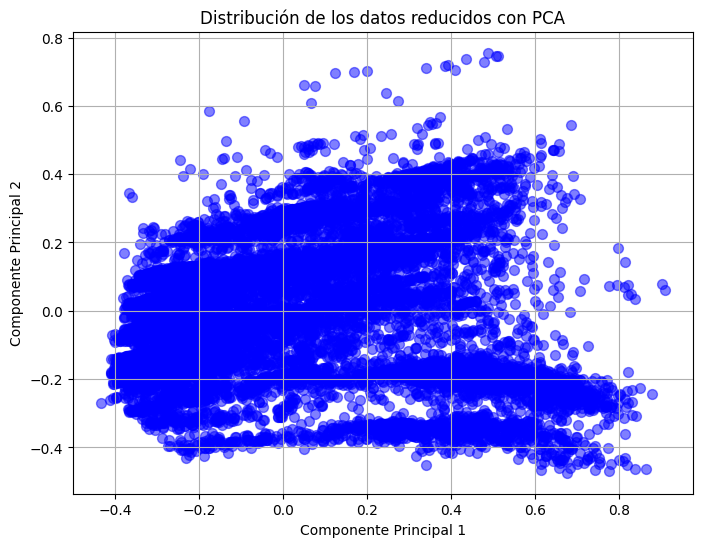

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir las dimensiones de los datos con PCA a 2 componentes para poder graficarlos
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)  # Usar los datos normalizados

# Graficar la distribución de los datos
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='blue', marker='o', s=50, alpha=0.5)
plt.title("Distribución de los datos reducidos con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

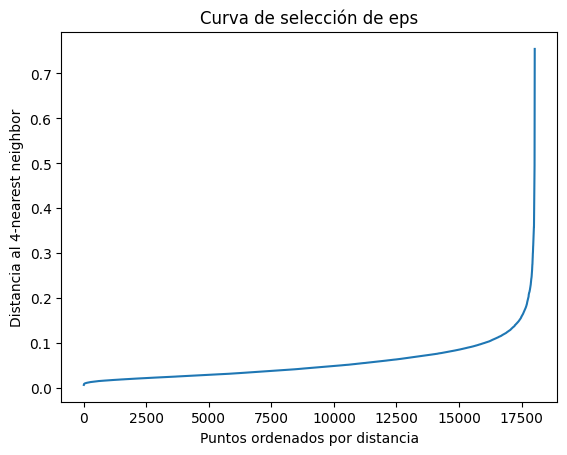

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt


# Ajustar NearestNeighbors para encontrar el valor de eps
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data_normalized)
distances, indices = neighbors_fit.kneighbors(data_normalized)

# Ordenar las distancias (de menor a mayor) para encontrar el "codo"
distances = np.sort(distances[:, 3], axis=0)

# Graficar las distancias de los 4-Nearest Neighbors
plt.plot(distances)
plt.title("Curva de selección de eps")
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel("Distancia al 4-nearest neighbor")
plt.show()

Aplicar el algoritmo DBSCAN

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Paso 2: Aplicar DBSCAN con eps=0.2
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(data_normalized)

# Ver las etiquetas obtenidas en el primer modelo DBSCAN
print("Etiquetas con eps=0.2:", np.unique(dbscan.labels_))

# Paso 3: Aplicar DBSCAN con eps=2
dbscan2 = DBSCAN(eps=0.4, min_samples=5)
dbscan2.fit(data_normalized)

# Ver las etiquetas obtenidas en el segundo modelo DBSCAN
print("Etiquetas con eps=0.4:", np.unique(dbscan2.labels_))


Etiquetas con eps=0.2: [-1  0  1  2  3  4  5  6  7  8]
Etiquetas con eps=0.4: [-1  0  1]


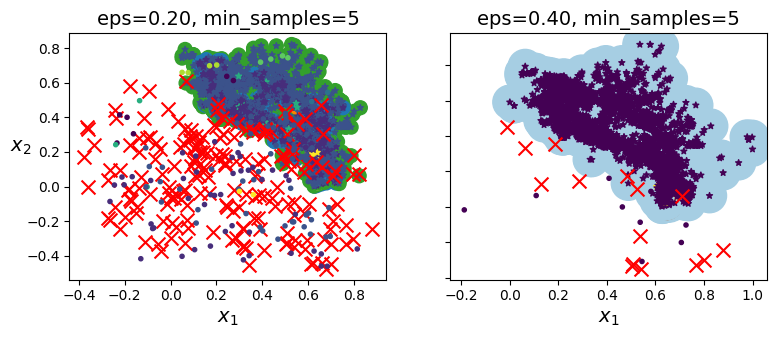

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Función para graficar los resultados de DBSCAN
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

# Reducir las dimensiones de los datos con PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_normalized)  # Utilizar los datos normalizados que tienes

# Graficar los resultados de DBSCAN
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X_pca, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X_pca, size=600, show_ylabels=False)

plt.show()

In [12]:
# Contar el número de puntos que son ruido en dbscan
num_ruido_dbscan = np.sum(dbscan.labels_ == -1)
num_dbscan = np.sum(dbscan.labels_ != -1)
print(f"Número de puntos que son ruido en dbscan: {num_ruido_dbscan}")
print(f"Número de puntos que pertenecen a una clase en dbscan: {num_dbscan}")

# Contar el número de puntos que son ruido en dbscan2
num_ruido_dbscan2 = np.sum(dbscan2.labels_ == -1)
num_dbscan2 = np.sum(dbscan2.labels_ != -1)
print(f"Número de puntos que son ruido en dbscan2: {num_ruido_dbscan2}")
print(f"Número de puntos que pertenecen a una clase en dbscan2: {num_dbscan2}")

Número de puntos que son ruido en dbscan: 191
Número de puntos que pertenecen a una clase en dbscan: 17839
Número de puntos que son ruido en dbscan2: 15
Número de puntos que pertenecen a una clase en dbscan2: 18015


In [13]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score para los datos normalizados y las etiquetas de los DBSCAN
silhouette_avg = silhouette_score(data_normalized, dbscan.labels_)
silhouette_avg2 = silhouette_score(data_normalized, dbscan2.labels_)

print(f"Silhouette Score para DBSCAN: {silhouette_avg}")
print(f"Silhouette Score para DBSCAN2: {silhouette_avg2}")

Silhouette Score para DBSCAN: 0.13566549148128965
Silhouette Score para DBSCAN2: 0.5079803987816054


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Paso 1: Reducir los puntos centrales de DBSCAN a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_components_pca = pca.fit_transform(dbscan.components_)  # Puntos centrales en 2D

# Paso 2: Entrenar el modelo KNN con los puntos centrales en 2 dimensiones
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_components_pca, dbscan.labels_[dbscan.core_sample_indices_])

# paso 3: optenemos los puntos de ruido para predecir sus clases
X_new_ = np.where(dbscan.labels_ == -1)[0]

X_new_ = data_normalized[X_new_, :]  

# Paso 4: Reducir los nuevos puntos a 2 dimensiones usando PCA
X_new_pca = pca.transform(X_new_)

# Paso 5: Predecir las etiquetas para los nuevos puntos
predictions = knn.predict(X_new_pca)
print("Predicciones para los nuevos puntos:", predictions)

# Paso 6: Obtener las probabilidades de pertenencia a cada clúster
proba_predictions = knn.predict_proba(X_new_pca)
print("Probabilidades de pertenencia a los clústeres:", proba_predictions)


Predicciones para los nuevos puntos: [2 2 2 1 2 2 1 2 1 1 1 2 2 2 5 0 1 1 0 2 1 2 1 2 2 1 1 1 2 2 8 4 2 1 2 2 5
 2 1 2 2 1 2 2 0 2 1 2 1 2 1 2 2 1 2 1 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 4 2 2 1 2 1 2 1 2 2 2 1 2 1 1 1 2 2 2 1 1 1 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 4 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 5 2 1 1 2 1 1 2 2 2 2 2 1 2 2
 1 1 0 2 2 2]
Probabilidades de pertenencia a los clústeres: [[0.  0.2 0.8 ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]
 ...
 [0.  0.  1.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]]


In [15]:
# Integrar las predicciones de los puntos de ruido en las etiquetas de dbscan
dbscan.labels_[dbscan.labels_ == -1] = predictions

# Calcular el nuevo coeficiente de silueta
new_silhouette_avg = silhouette_score(data_normalized, dbscan.labels_)
print(f"Nuevo Silhouette Score después de integrar las predicciones de los ruidos: {new_silhouette_avg}")

Nuevo Silhouette Score después de integrar las predicciones de los ruidos: 0.13511304608832142


In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Paso 1: Reducir los puntos centrales de DBSCAN a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_components_pca = pca.fit_transform(dbscan2.components_)  # Puntos centrales en 2D

# Paso 2: Entrenar el modelo KNN con los puntos centrales en 2 dimensiones
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_components_pca, dbscan2.labels_[dbscan2.core_sample_indices_])

# paso 3: optenemos los puntos de ruido para predecir sus clases
X_new_ = np.where(dbscan2.labels_ == -1)[0]

X_new_ = data_normalized[X_new_, :]  

# Paso 4: Reducir los nuevos puntos a 2 dimensiones usando PCA
X_new_pca = pca.transform(X_new_)

# Paso 5: Predecir las etiquetas para los nuevos puntos
predictions2 = knn2.predict(X_new_pca)
print("Predicciones para los nuevos puntos:", predictions2)

# Paso 6: Obtener las probabilidades de pertenencia a cada clúster
proba_predictions2 = knn2.predict_proba(X_new_pca)
print("Probabilidades de pertenencia a los clústeres:", proba_predictions2)


Predicciones para los nuevos puntos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Probabilidades de pertenencia a los clústeres: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [17]:
# Integrar las predicciones de los puntos de ruido en las etiquetas de dbscan
dbscan2.labels_[dbscan2.labels_ == -1] = predictions2

# Calcular el nuevo coeficiente de silueta
new_silhouette_avg = silhouette_score(data_normalized, dbscan2.labels_)
print(f"Nuevo Silhouette Score después de integrar las predicciones de los ruidos: {new_silhouette_avg}")

Nuevo Silhouette Score después de integrar las predicciones de los ruidos: 0.5416769833623748


ALGORITMO GAUSSIAN MIXTURE 

importamos las librerias necesarias

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [19]:
# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)
display(X_normalized)

array([[-0.88113186,  0.19302142,  0.43953554, ...,  0.25855761,
        -0.20971172, -0.1511671 ],
       [-0.96417946,  0.2543102 ,  0.01476925, ..., -0.67887874,
        -0.60737038, -0.12640553],
       [-0.96100533,  0.25055172,  0.13037842, ..., -0.64579275,
        -0.63076207, -0.13878631],
       ...,
       [-0.22216269,  1.32355379,  0.14596618, ...,  0.31370093,
         0.258122  , -0.08926318],
       [-0.5778208 , -0.08173169, -0.3749246 , ..., -1.13105392,
        -0.5839787 , -0.10164396],
       [ 0.58869617, -0.77521315, -0.84905212, ..., -1.21928322,
        -0.65415375, -0.08926318]])

entrenamos el modelo Gaussian Mixture

In [20]:
# Crear el modelo Gaussian Mixture
gmm = GaussianMixture(n_components=3, random_state=42)  # Ajusta n_components según tu caso

# Entrenar el modelo
gmm.fit(X_normalized)

# Predecir las etiquetas de los clusters
labels = gmm.predict(X_normalized)

# Mostrar las etiquetas obtenidas
print("Etiquetas de los clusters:", np.unique(labels))


d:\2-2024\SIS420 IA\SIS420_Aldrin\for_IA\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\2-2024\SIS420 IA\SIS420_Aldrin\for_IA\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Aldrin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aldrin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__


Etiquetas de los clusters: [0 1 2]


Evaluar el modelo

In [21]:
# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_normalized, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.13967040903332803


visualizar los resultados

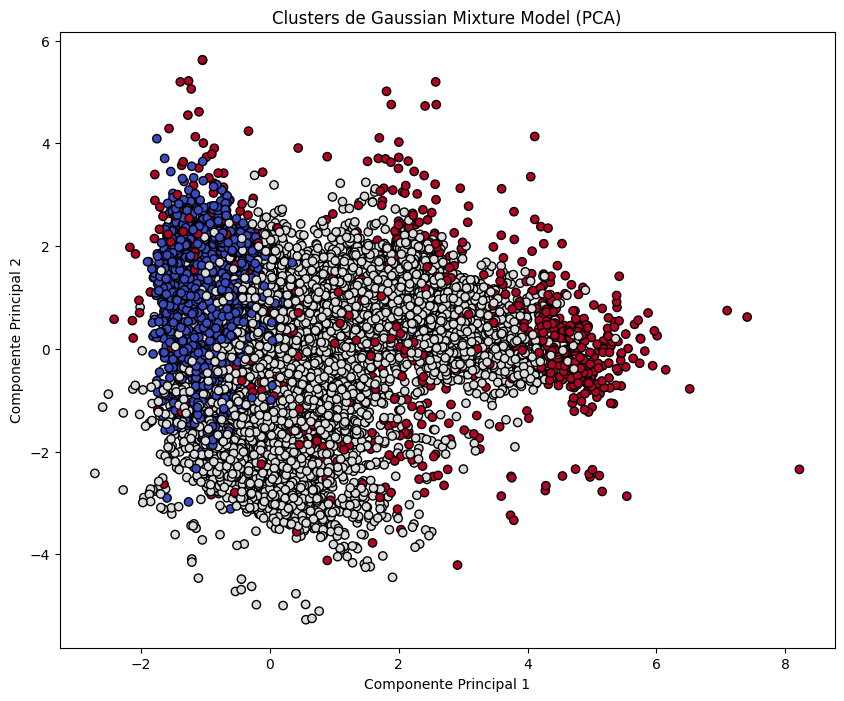

In [22]:
# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Graficar los clusters en el espacio reducido
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, edgecolors='k', cmap='coolwarm')
plt.title('Clusters de Gaussian Mixture Model (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()